# Assignment 2 - AIDI 1002 : Machine Learning Programming

### 1. Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/data) and answer the following questions 

In [1]:
import pandas as pd
import numpy as np

# Loading data
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Summary of the DataFrame 
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
# Calculates and displays the sum of null values 
mall_data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [4]:
# Calculates and displays the sum of duplicate values 
mall_data.duplicated().sum()

0

In [5]:
# Groups the data by the 'Genre' column and counts the occurrences within each group.
mall_data.groupby('Genre').count()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
Genre,,,,
Female,112,112,112,112
Male,88,88,88,88


In [6]:
# Converting Values into binary for Genre
mall_data['Genre'] = mall_data['Genre'].apply(lambda x: 1 if x == 'Male' else 0)
mall_data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### 1.1 Perform k-means clustering over this dataset using Manhattan distance as the distance-measure.

In [7]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import numpy as np

In [8]:
# Applies z-score normalization (standardization) to the numeric columns
norm_mall_data = StandardScaler().fit_transform(mall_data)

In [9]:
# Define a custom distance function for Manhattan distance
def manhattan_distance(X, centers):
    return np.sum(np.abs(X - centers[:, np.newaxis]), axis=2)

# Specify the number of clusters
n_clusters = 4

# Initialize KMeans with custom distance function
kmeans_manhattan = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)

# Replace the default Euclidean distance function with Manhattan distance
kmeans_manhattan._transform = manhattan_distance

# Fit the KMeans model
kmeans_manhattan.fit(norm_mall_data)

KMeans(n_clusters=4, random_state=42)

In [10]:
labels = kmeans_manhattan.fit_predict(norm_mall_data)

### 1.2 After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as‘Labels’ and fill it with cluster number assigned by k-means algorithm. (5 Points)

In [11]:
# add cluster ids as another column
mall_data["Labels"] = labels
mall_data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,0
197,198,1,32,126,74,3
198,199,1,32,137,18,0


### 1.3 Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression, decision trees, random forest, and Naive Bayes algorithm.

In [12]:
# Importing Neccessary Libraries for the above questions :
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
# Splitting the dataset for testing and training 
X_train, X_test, y_train, y_test = train_test_split(mall_data.drop('Labels', axis=1), mall_data['Labels'], test_size=0.2, random_state=0)

In [14]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Decision tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

In [16]:
# Random forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

In [17]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

### 1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of clusters, like is the clusters or groups are making sense or not ?

In [18]:
print("The Accuracy of all models-")
print("Logistic Regression accuracy : ", accuracy_lr)
print("Decision Tree Accuracy : ", accuracy_dt)
print("Random Forest Accuracy : ", accuracy_rf)
print("Naive Bayes accuracy : ", accuracy_nb)

The Accuracy of all models-
Logistic Regression accuracy :  0.95
Decision Tree Accuracy :  1.0
Random Forest Accuracy :  1.0
Naive Bayes accuracy :  0.975


In [19]:
print("The Classification scores for the models-")
print("Logistic Regression classification score :\n ", report_lr)
print("Decision Tree classification score : \n", report_dt)
print("Random Forest classification score : \n", report_rf)
print("Naive Bayes classification score : \n", report_nb)

The Classification scores for the models-
Logistic Regression classification score :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.89      0.94         9
           3       0.91      0.91      0.91        11

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Decision Tree classification score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Rand

#### The classification scores suggest that all models, including Logistic Regression, Decision Tree, Random Forest, and Naive Bayes, perform reasonably well with high accuracy, precision, recall, and F1-scores.

#### But the Decision Tree, Random Forest, and Naive Bayes algorithms produced more homogenous clusters than the Logistic Regression method for the provided dataset, according to the classification Scores.

# 2. Consider the breast_cancer dataset given in the sklearn library and answer the following questions.

### 2.1 Import the breast_cancer dataset from sklearn.datasets library.

In [36]:
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer_data = load_breast_cancer()

In [21]:
# Create a DataFrame from the dataset
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Add the target column to the DataFrame
cancer_df['target'] = cancer_data.target

# Display the head of DataFrame
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
#summary of the DataFrame 
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [23]:
#calculates and displays the sum of null values
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [24]:
#groups the data by the 'target' column
cancer_df.groupby('target').count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357


### 2.2 Perform PCA (2 components) and LDA (1 components) over the dataset.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = cancer_df.drop('target', axis=1)
y = cancer_df['target']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [44]:
# Perform LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)
lda_component = pd.DataFrame(data = X_lda, columns = ['c1'])
lda_component.head()

,c1
0,3.323927
1,2.319108
2,3.747425
3,4.048549
4,2.281158


### 2.3 Visualise the components and see if its able to segregate the class label in breast_cancer dataset.

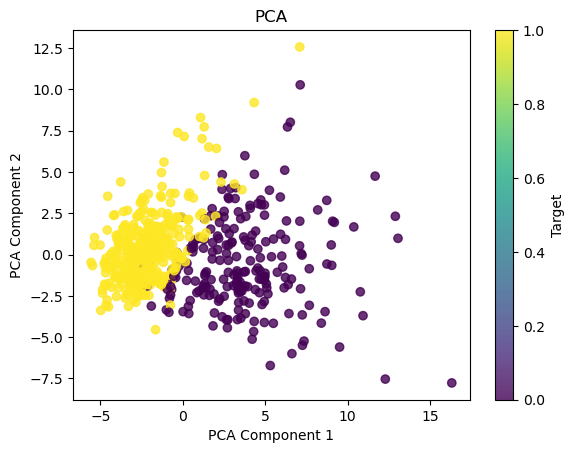

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# plot for PCA
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer_df.target, cmap='viridis', alpha=0.8)  # Adjust color and size
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA')
plt.colorbar(scatter, label='Target')  # Add a color bar with labels
plt.show()

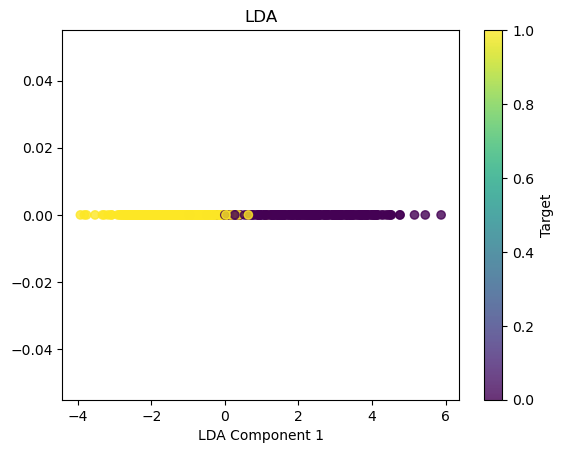

In [39]:
# plot for LDA
scatter = plt.scatter(X_lda[:, 0], np.zeros_like(X_lda), c=cancer_df.target, cmap='viridis', alpha=0.8)  # Adjust color and size
plt.xlabel('LDA Component 1')
plt.title('LDA')
plt.colorbar(scatter, label='Target')  # Add a color bar with labels
plt.show()

The visualizations of PCA and LDA components demonstrate clear separation of class labels in the breast cancer dataset.

### 2.4 What is the maximum variance explained by both the components in PCA and LDA.

In [34]:
# The maximum variance explained by PCA components 
print("The maximum variance explained by PCA Component 1: {:.2f}%".format(pca.explained_variance_ratio_[0]*100))
print("The maximum variance explained by PCA Component 2: {:.2f}%".format(pca.explained_variance_ratio_[1]*100))

The maximum variance explained by PCA Component 1: 44.27%
The maximum variance explained by PCA Component 2: 18.97%


In [35]:
# The maximum variance explained by LDA components
print("The maximum variance explained by LDA Component 1: {:.2f}%".format(lda.explained_variance_ratio_[0]*100))

The maximum variance explained by LDA Component 1: 100.00%


### 2.5 Comment on the working of PCA and LDA and which one is better for breast_cancer dataset.

#### PCA Component 1 and Component 2:

The first principal component (PCA Component 1) is really good at summarizing our data and explains 44.27% of the main patterns.
The second principal component (PCA Component 2) is also helpful but not as much, explaining 18.97% of what's going on.
Together, these two components give us a pretty good overview of our data, suggesting that we can understand a lot about it by looking at just two aspects.

#### LDA Component 1:

The main thing to know about Linear Discriminant Analysis (LDA) Component 1 is that it explains 100% of the differences between our categories (classes). 
LDA is all about making things that are different stand out, so it's not focused on explaining all the different patterns like PCA does. 
LDA is better adapted for supervised learning tasks where it class labels are known.

#### Overall,PCA is ideal for uncovering hidden patterns and dimensionality reduction without class labels, while LDA is effective for distinguishing classes when class information is available.